[2.76529744e+03 4.29536817e+07]


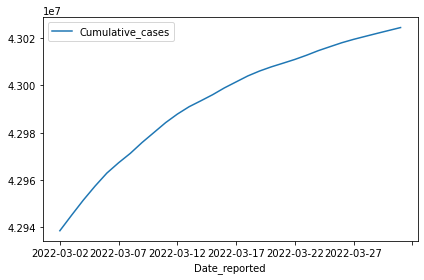

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df = pd.read_csv('covid_data.csv')

cases=df[["Country","Date_reported","Cumulative_cases"]]

da=cases.loc[cases['Country'] == 'India']

da=da.loc[da['Date_reported'] > '2022-03-01']
da=da.loc[da['Date_reported'] < '2022-04-01']
x = range(0,30)
y = da["Cumulative_cases"]
slope_intercept = np.polyfit(x,y,1)
print(slope_intercept)
da.set_index('Date_reported').plot()

plt.show()
